## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
mouse_data_combined = pd.merge(mouse_metadata, study_results, on = "Mouse ID" )
# Display the data table for preview
mouse_data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mice_count = len(mouse_data_combined["Mouse ID"].unique())
mice_count

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = mouse_data_combined.groupby(['Mouse ID'])['Timepoint'].agg(list).reset_index(name='Timepoints')
dup_mice_id

,Mouse ID,Timepoints
0,a203,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
1,a251,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
2,a262,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
3,a275,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
4,a366,"[0, 5, 10, 15, 20, 25, 30]"
...,...,...
244,z435,"[0, 5, 10]"
245,z578,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
246,z581,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
247,z795,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id_time= mouse_data_combined[mouse_data_combined.duplicated(subset = ['Mouse ID', 'Timepoint'], keep=False)]
dup_mice_id_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_time = mouse_data_combined.drop_duplicates (subset=["Mouse ID", "Timepoint"], keep = 'last').reset_index(drop = True)
clean_mouse_data_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mouse_data_time["Mouse ID"])
clean_mice_count

1888

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [12]:
regimen_grouped_mean = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
regimen_grouped_mean = regimen_grouped_mean.rename(columns= {"Tumor Volume (mm3)": "Mean"}).round(2)
regimen_grouped_mean

,Mean
Drug Regimen,
Capomulin,40.68
Ceftamin,52.59
Infubinol,52.88
Ketapril,55.24
Naftisol,54.33
Placebo,54.03
Propriva,52.38
Ramicane,40.22
Stelasyn,54.23


In [13]:
regimen_grouped_median = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
regimen_grouped_median = regimen_grouped_median.rename(columns= {"Tumor Volume (mm3)": "Median"}).round(2)
regimen_grouped_median

,Median
Drug Regimen,
Capomulin,41.56
Ceftamin,51.78
Infubinol,51.82
Ketapril,53.70
Naftisol,52.51
Placebo,52.29
Propriva,50.78
Ramicane,40.67
Stelasyn,52.43


In [14]:
regimen_grouped_variance = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
regimen_grouped_variance = regimen_grouped_variance.rename(columns= {"Tumor Volume (mm3)": "Variance"}).round(2)
regimen_grouped_variance

,Variance
Drug Regimen,
Capomulin,24.95
Ceftamin,39.29
Infubinol,43.13
Ketapril,68.55
Naftisol,66.17
Placebo,61.17
Propriva,43.22
Ramicane,23.49
Stelasyn,59.45


In [15]:
regimen_grouped_std = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
regimen_grouped_std = regimen_grouped_std.rename(columns= {"Tumor Volume (mm3)": "StD"}).round(2)
regimen_grouped_std

,StD
Drug Regimen,
Capomulin,4.99
Ceftamin,6.27
Infubinol,6.57
Ketapril,8.28
Naftisol,8.13
Placebo,7.82
Propriva,6.57
Ramicane,4.85
Stelasyn,7.71


In [16]:
regimen_grouped_SEM = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
regimen_grouped_SEM = regimen_grouped_SEM.rename(columns= {"Tumor Volume (mm3)": "SEM"}).round(2)
regimen_grouped_SEM

,SEM
Drug Regimen,
Capomulin,0.33
Ceftamin,0.47
Infubinol,0.49
Ketapril,0.60
Naftisol,0.60
Placebo,0.58
Propriva,0.53
Ramicane,0.32
Stelasyn,0.57


In [17]:
regimen_grouped_stats1 = pd.merge(regimen_grouped_mean, regimen_grouped_median, on="Drug Regimen")

In [18]:
regimen_grouped_stats2 = pd.merge(regimen_grouped_stats1, regimen_grouped_variance, on= "Drug Regimen")

In [19]:
regimen_grouped_stats3 = pd.merge(regimen_grouped_stats2, regimen_grouped_std, on= "Drug Regimen")

In [20]:
regimen_grouped_stats = pd.merge(regimen_grouped_stats3, regimen_grouped_SEM, on= "Drug Regimen")

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped_stats

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,StD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [22]:
clean_mouse_data_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Creating dataframe of Drug Regimen column
drug_regimen = clean_mouse_data_time.groupby('Drug Regimen')
#Creating a dataframe to count the number of timepoints for each drug regimen
drug_regimen_timepoints= pd.DataFrame(drug_regimen['Drug Regimen'].count())


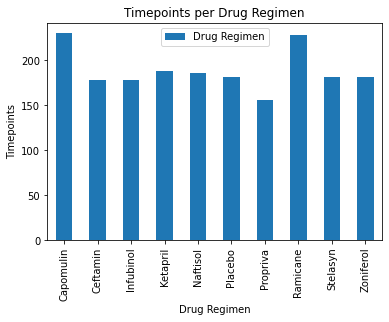

In [24]:
#Creating a bar plot to show drug regimen/timepoint data
timepoint_plot_pd = drug_regimen_timepoints.plot(kind = 'bar', title="Timepoints per Drug Regimen")

#Setting labels
timepoint_plot_pd.set_xlabel("Drug Regimen")
timepoint_plot_pd.set_ylabel("Timepoints")

plt.show()

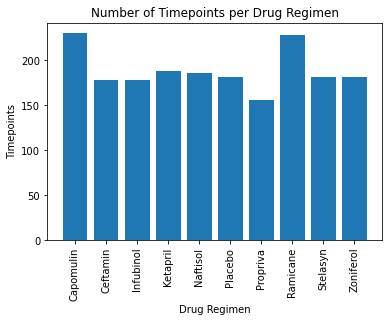

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Creating bar plot for drug regimen/timepoint using pyplot
#Setting x axis
x_axis = np.arange(len(drug_regimen_timepoints))

#Creating a bar plot
plt.bar(x_axis, drug_regimen_timepoints["Drug Regimen"], align="center")
#Setting labels for bars
bar_labels = [value for value in x_axis]
plt.xticks(bar_labels, list(drug_regimen_timepoints.index), rotation="vertical")

#Setting Title and labels
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Creating a dataframe by 'Sex' column
sex_grouped = clean_mouse_data_time.groupby('Sex')
#Creating a dataframe to count the number mice per sex
count_sex_grouped = pd.DataFrame(sex_grouped['Sex'].count())

count_sex_grouped


,Sex
Sex,
Female,930
Male,958


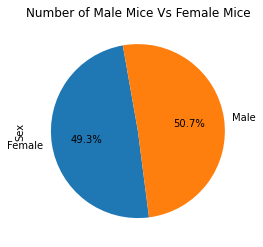

In [27]:
#Creating a pie chart using pandas to display Sex data
count_sex_grouped.plot(kind='pie', y='Sex', title="Number of Male Mice Vs Female Mice", autopct='%1.1f%%', startangle=100, legend = False)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

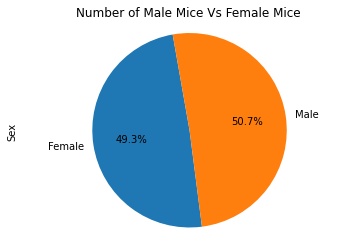

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Defining values and labels for pyplot pie chart
sexs = list(count_sex_grouped.index.values)
percentages = count_sex_grouped['Sex']
#Creating the pie chart with title and labels
plt.pie(percentages, labels=sexs, startangle=100, autopct="%1.1f%%")
plt.title("Number of Male Mice Vs Female Mice")
plt.ylabel("Sex")
plt.axis("equal")

plt.show

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints= mouse_data_combined.loc[mouse_data_combined.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()


In [30]:
clean_mouse_data=mouse_data_combined.loc[mouse_data_combined["Mouse ID"]!='g989']

In [31]:
print(len(clean_mouse_data["Mouse ID"].unique()))

248


In [32]:
# Start by getting the last (greatest) timepoint for each mouse
group_max= clean_mouse_data.groupby("Mouse ID")["Timepoint"].max()
group_max=group_max.reset_index()

In [33]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_timepoints_tumor = group_max.merge(clean_mouse_data, on= ["Mouse ID", "Timepoint"])
final_timepoints_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_tumor_vol=final_timepoints_tumor.loc[final_timepoints_tumor["Drug Regimen"]==regimen]
    
    # add subset 
    tumor_vol.append(regimen_tumor_vol["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = regimen_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tum

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef707a44c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef707a4b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef707a4160>,
 'medians': [<matplotlib.lines.Line2D at 0x1ef707ae280>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ef707ae5e0>,
 'means': []}

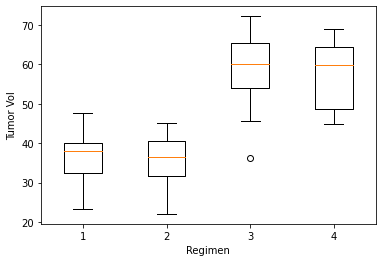

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.xlabel("Regimen")
plt.ylabel("Tumor Vol")
plt.boxplot(tumor_vol)

## Line and Scatter Plots

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401=clean_mouse_data.loc[clean_mouse_data["Mouse ID"]=="x401"]
x401

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


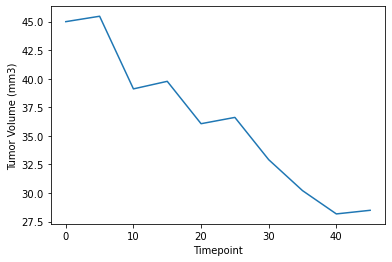

In [37]:
x_axis = x401["Timepoint"]
y_axis = x401["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.show
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title = ("Tumor Volume vs. Time Point")

In [38]:
#Single out Capomulin data from clean data
capomulin = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]

In [39]:
#Calculate Avg tumor volume and mouse weights
avg_tumor_vol = capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_mouse_weight = capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()

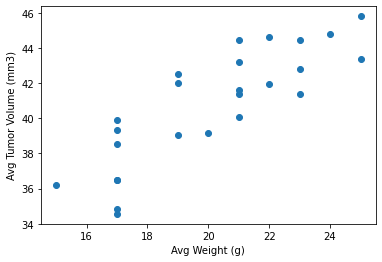

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = avg_mouse_weight
y_values = avg_tumor_vol
plt.scatter(x_values, y_values)
plt.xlabel('Avg Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


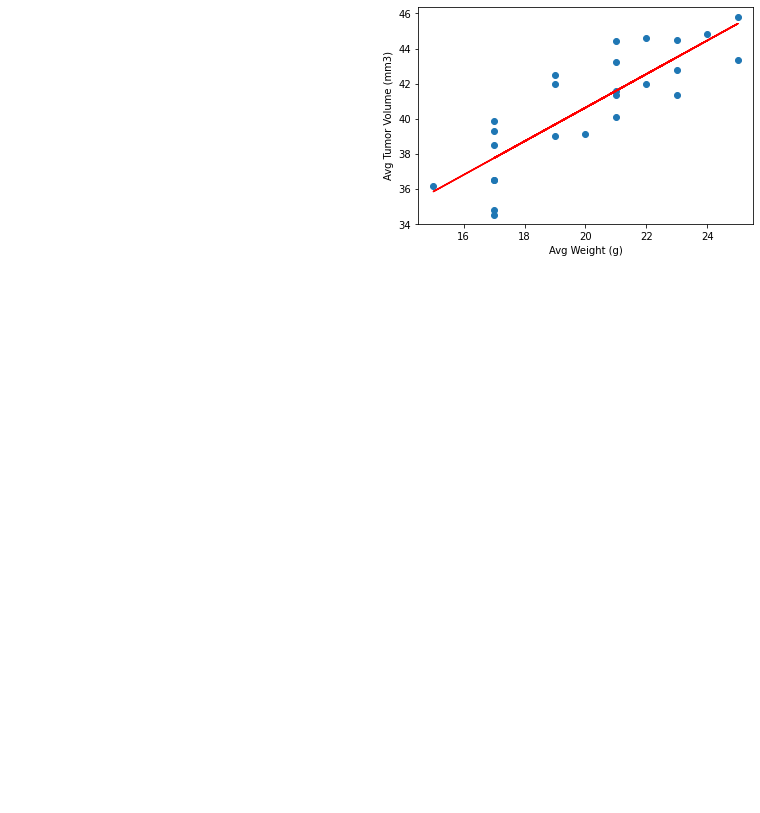

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_mouse_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=7,color="red")
plt.xlabel('Avg Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()